In [36]:
import os
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from scipy.ndimage import convolve
from skimage.measure import block_reduce
from sklearn.preprocessing import MinMaxScaler

# Images tools
import io
from PIL import Image
import base64

In [37]:
###############
## FUNCIONES ##
###############

# Función para limpiar y reemplazar comillas
def limpiar_y_reemplazar_comillas(texto):
    resultado = re.findall(r'\"(.*?)\"', texto)
    return resultado[0]

In [38]:
os.chdir('C:/Users/alber/OneDrive/Desktop/MatCAD/4t Curso/TFG')

In [39]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0

In [40]:
all_weights_first_layer = pd.read_csv('modelos_entrenados_10000_epoch/weights_first_layer_epoch_10000.csv', header=None)

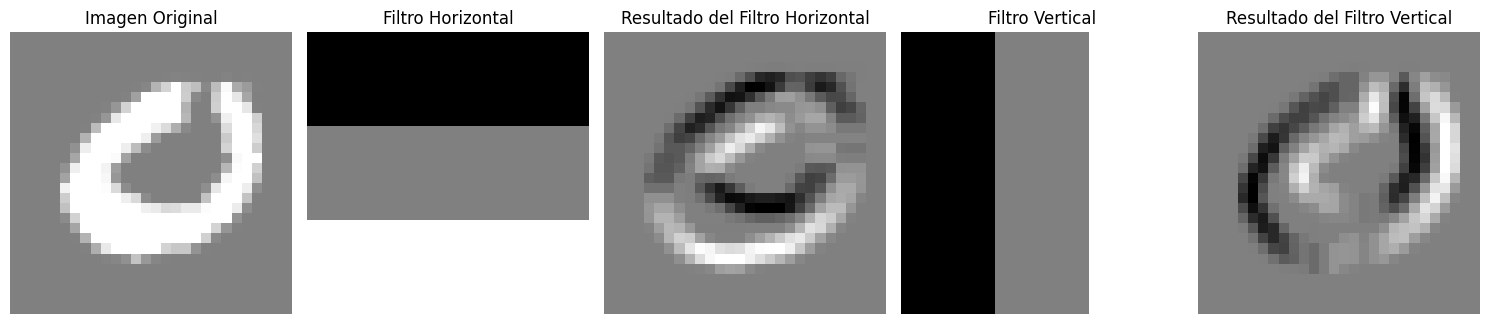

In [41]:
imagen_muestra = x_train[1363].reshape((28, 28)) #139, 102, 8044, 1363
filtro_capa_1 = all_weights_first_layer.iloc[3].to_numpy().reshape((3, 3)) # 3, 5, 9 buenos numeros

filtro_horizontal = np.array([  -1, -1, -1,
                                0, 0, 0,
                                1, 1, 1]).reshape((3, 3))

filtro_vertical = np.array([    -1, 0, 1,
                                -1, 0, 1,
                                -1, 0, 1]).reshape((3, 3))

# Aplicar el filtro personalizado a la imagen
resultado_filtrado_horizontal = convolve(imagen_muestra, filtro_horizontal)
resultado_filtrado_vertical = convolve(imagen_muestra, filtro_vertical)

# Mostrar el resultado con el filtro personalizado
fig, axes = plt.subplots(1, 5, figsize=(15, 15))

axes[0].imshow(imagen_muestra, cmap='gray', vmin=-1, vmax=1)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(filtro_horizontal, cmap='gray', vmin=-1, vmax=1)
axes[1].set_title(f'Filtro Horizontal')
axes[1].axis('off')

axes[3].imshow(filtro_vertical, cmap='gray', vmin=-1, vmax=1)
axes[3].set_title(f'Filtro Vertical')
axes[3].axis('off')


max_filt_h = round(resultado_filtrado_horizontal.flatten().max())
min_filt_h = round(resultado_filtrado_horizontal.flatten().min())

max_filt_v = round(resultado_filtrado_vertical.flatten().max())
min_filt_v = round(resultado_filtrado_vertical.flatten().min())


axes[2].imshow(resultado_filtrado_horizontal, cmap='gray', vmin=min_filt_h, vmax=max_filt_h)
axes[2].set_title('Resultado del Filtro Horizontal')
axes[2].axis('off')

axes[4].imshow(resultado_filtrado_vertical, cmap='gray', vmin=min_filt_v, vmax=max_filt_v)
axes[4].set_title('Resultado del Filtro Vertical')
axes[4].axis('off')

plt.tight_layout()
plt.show()

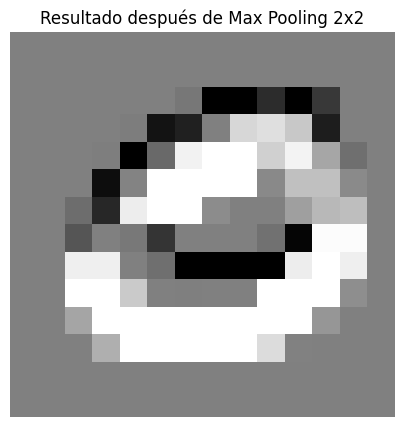

In [42]:
# Aplicando max pooling con un tamaño de ventana de 2x2 al resultado filtrado personalizado
resultado_max_pooling = block_reduce(resultado_filtrado_horizontal, (2,2), np.max)
# Mostrando el resultado después de aplicar max pooling
plt.figure(figsize=(5, 5))
plt.imshow(resultado_max_pooling, cmap='gray', vmin=-1, vmax=1)
plt.title("Resultado después de Max Pooling 2x2")
plt.axis('off')
plt.show()


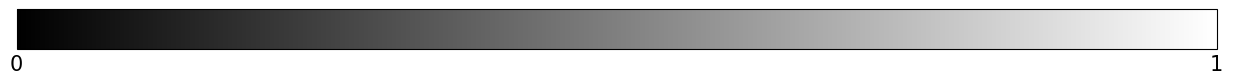

In [43]:
# Mostrar solo la línea de abajo sin los bordes negros para una visualización más limpia
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(figsize=(15, 0.4))
cbar = ax.imshow(gradient, aspect='auto', cmap='gray')
ax.set_axis_off()

# Crear un eje adicional para las marcas sin bordes
cax = fig.add_axes([0.1, 0, 0.8, 1])
cbar = plt.colorbar(cbar, cax=cax, orientation='horizontal', ticks=[0, 1])
cbar.ax.set_xticklabels(['0', '1'], fontsize=15)
cbar.ax.tick_params(size=0)  # Remover marcas de los ticks para una apariencia más limpia

plt.show()